In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import plotly.express as px 


In [5]:
df = pd.read_csv('../data/country-data.csv')
countries = df['country'].tolist()
df = df.drop(['country'], axis=1)

## Correlation

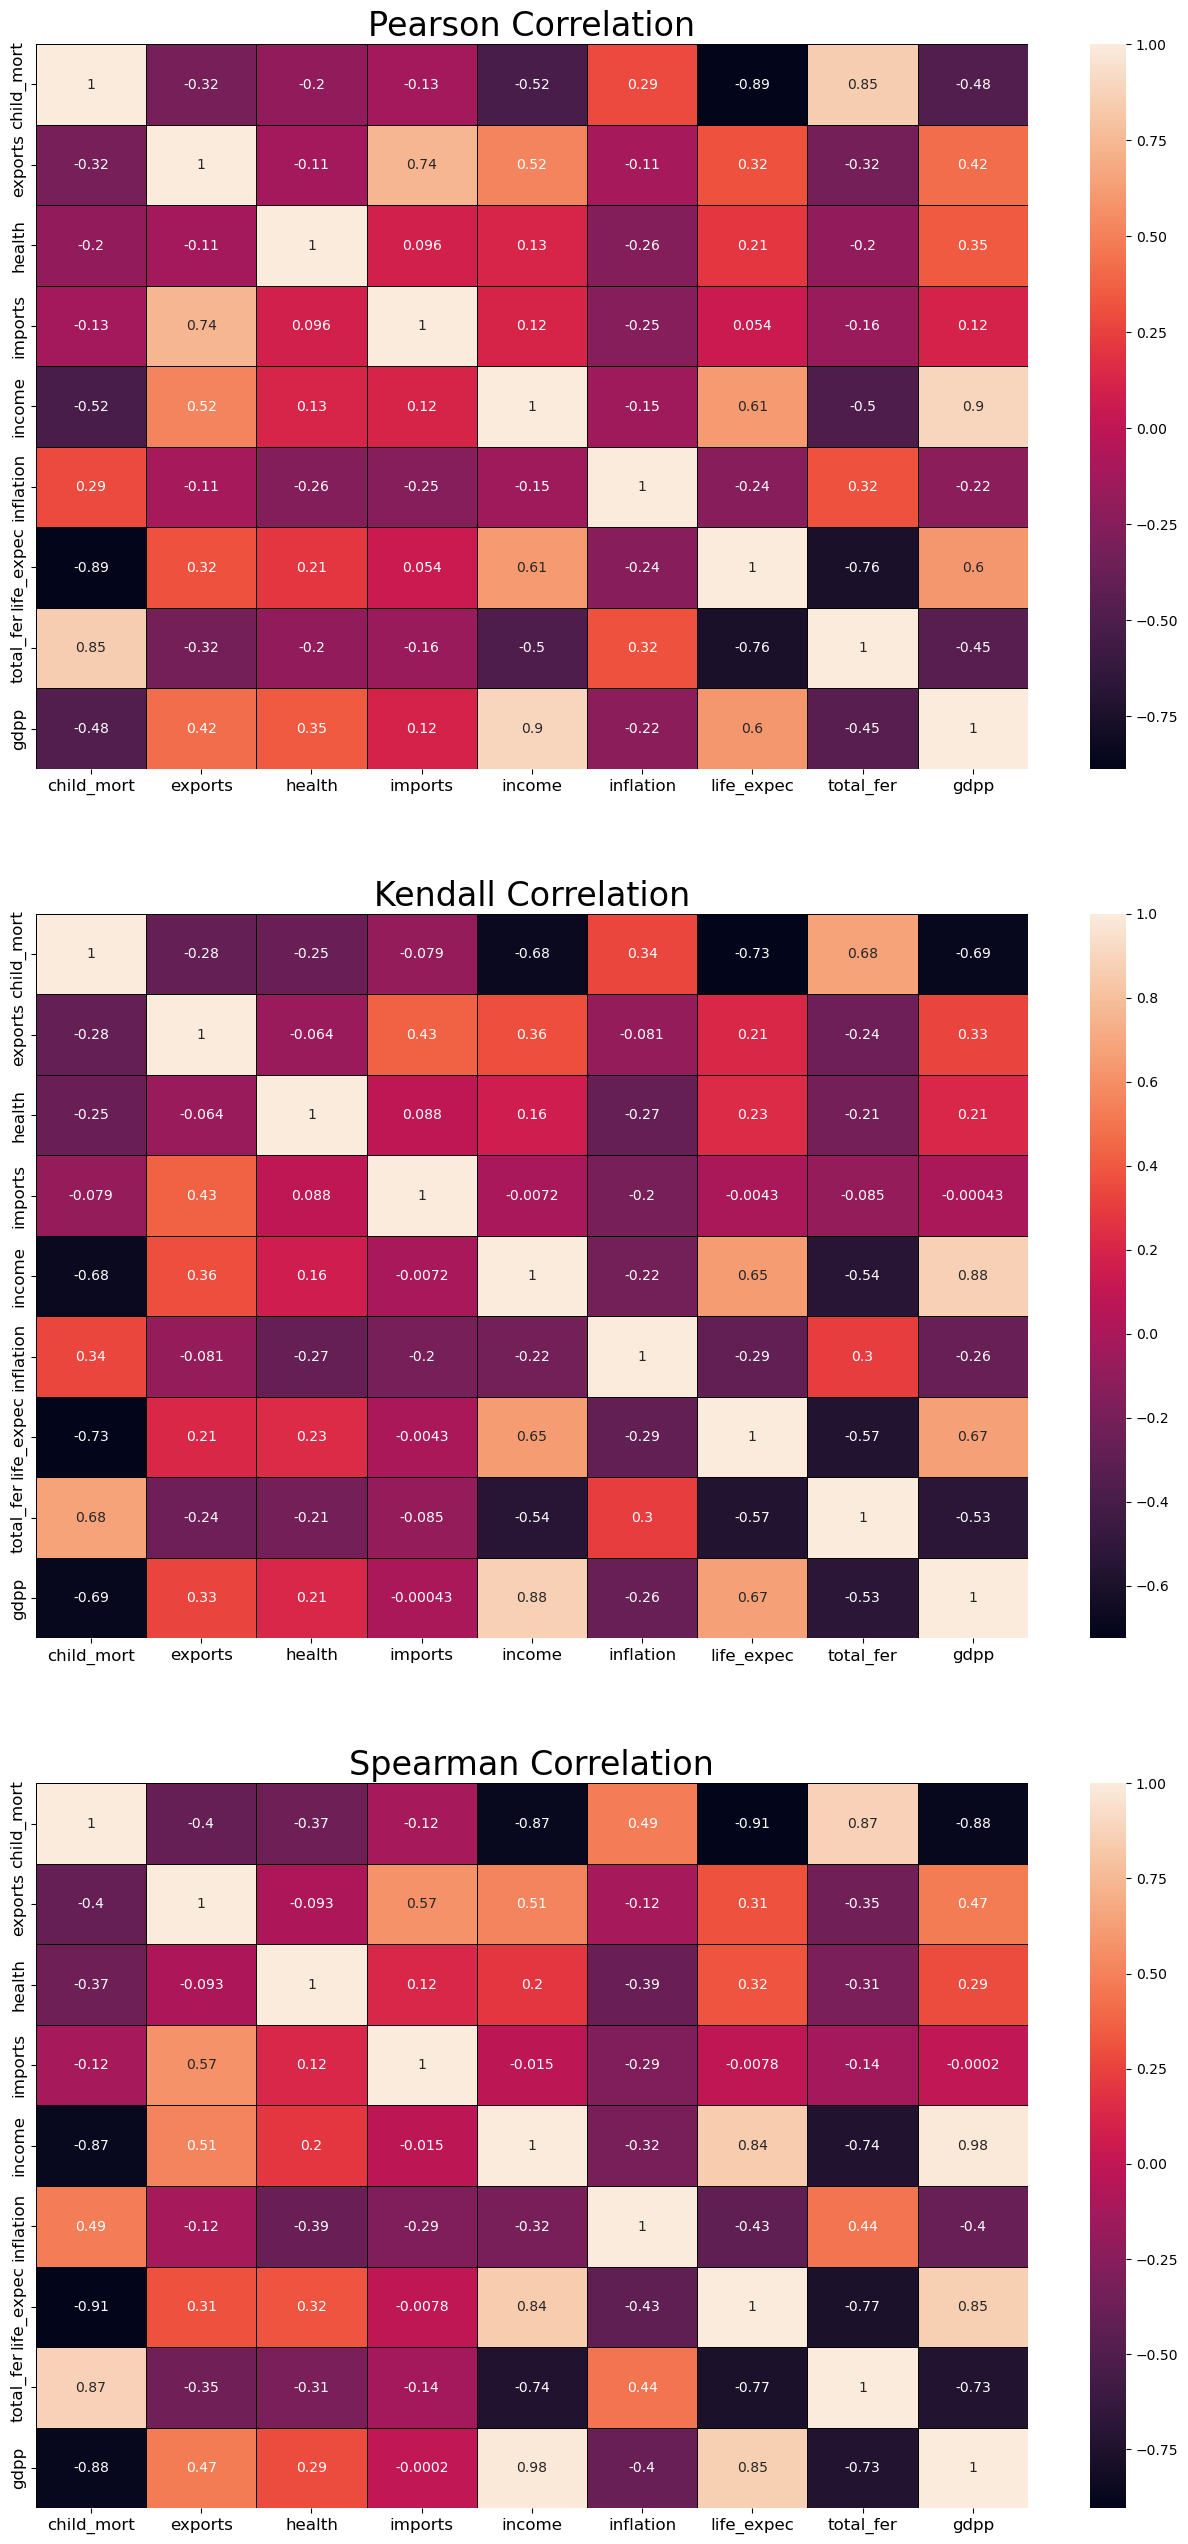

In [6]:
### make a fig with 3 subplots with 3 different correlation methods
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 32))
def heatmap(df, ax, title):
    sns.heatmap(df, annot=True, cmap='rocket', linewidths=0.5, linecolor='black', ax=ax)
    ax.set_title(title, fontsize=24)
    ax.tick_params(axis='both', which='both', labelsize=12)
heatmap(df.corr(method='pearson'), ax1, 'Pearson Correlation')
heatmap(df.corr(method='kendall'), ax2, 'Kendall Correlation')
heatmap(df.corr(method='spearman'), ax3, 'Spearman Correlation')

In [7]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) # numpy array

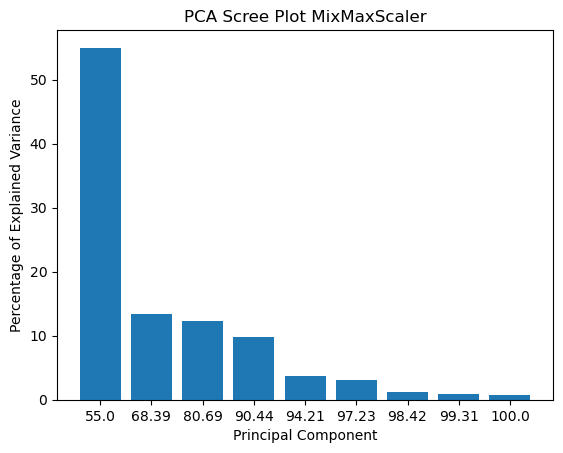

In [13]:
pca = PCA() # create a PCA object with all components
pca.fit_transform(scaled_data) # fit the data to the PCA object and transform it and applying the dimensionality reduction on it.

scree = list(pca.explained_variance_ratio_*100) # get variance ratios
labels = ['PC' + str(x) for x in range(1, len(scree)+1)] # make labels for scree plot
labels = [scree[i] for i in range(len(scree))]
for i in range(1, len(scree)):
    labels[i] = labels[i] + labels[i-1]
labels = [round(i, 2) for i in labels]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(scree)+1), height=scree, tick_label = labels) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot MixMaxScaler')
plt.show()

In [9]:
#print(f'{round(sum(scree[:2]),2)}% of the variance is explained by the first  principal components')
pca = PCA(n_components=4) # create a PCA object 
X = pca.fit_transform(scaled_data) # do the math
df = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3', 'PC4']) # make a dataframe of the PCA coordinates
df.index = countries # label the rows using country names

3D PCA

In [10]:
fig = px.scatter_3d(x=df.PC1, y=df.PC2, z=df.PC3, opacity=0.7, color=df.PC4)
fig.update_traces(mode="markers", hovertemplate=countries)
fig.show()

2D PCA

In [11]:
fig = px.scatter(x=df.PC1, y=df.PC2, color=df.PC3, color_continuous_scale='tempo')
fig.update_traces(mode="markers", hovertemplate=countries)
fig.show()

/Users/sebastian/opt/anaconda3/envs/standenv/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



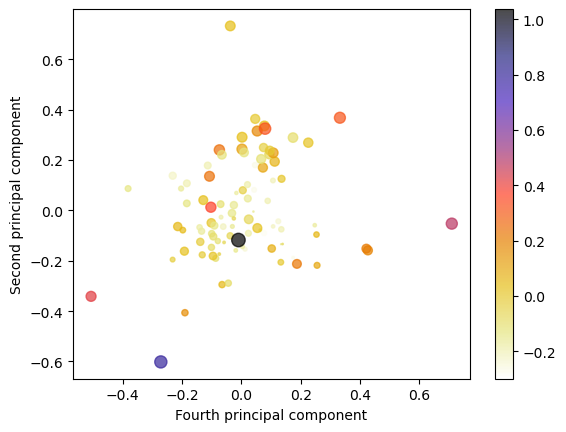

In [12]:
fig = plt.scatter(df.PC4, df.PC3, c=df.PC2, s=df.PC1*100, alpha=0.7, cmap='CMRmap_r')


plt.xlabel('Fourth principal component')
plt.ylabel('Second principal component')
plt.colorbar()